In [1]:
pacman::p_load(
  forcats,
  ggplot2,
  data.table,
  tidyr,
  seriation,
  dplyr,
  ggrepel,
  patchwork,
  fractional
)

In [2]:
setwd("~/work/fibroblast_timecourse")

In [3]:
source("R/002_helper_functions.R")

In [4]:
theme_set(theme_classic(base_size = 18) %+replace% theme(strip.background = element_blank(),
  # axis.line.y = element_line(colour = "black", size = 0.2),
  # axis.line.x = element_line(colour = "black", size = 0.2),
  axis.ticks   = element_line(colour = "black", size = 0.3),
  panel.border = element_rect(size = 0.3, fill = NA),
  axis.line    = element_blank(),
  plot.title   = element_text(size = 18, vjust = 2, hjust = 0.5)
))

In [15]:
sirnas <- c("CUX1", "ELF3", "LIFR", "STAT3", "STAT4")

meta_colors <- list()

meta_colors$sirna <- c(
  "Ctrl"  = "black",
  "CUX1"  = '#1B9E77',
  "STAT3" = '#D95F02',
  "STAT4" = '#7570B3',
  "ELF3"  = '#E7298A',
  "LIFR"  = '#66A61E'
)

meta_colors$Stimulation <- c(
  "None" = "grey50",
  "TNF (1)" = "#FEB24C",
  "TNF (1) + IL17 (1)" = "#E31A1C",
  "TNF (1) + IL17 (10)" = "#800026"
)

meta_colors$dosefactor <- c(
  "0" = meta_colors$Stimulation[["TNF (1)"]],
  "1" = meta_colors$Stimulation[["TNF (1) + IL17 (1)"]],
  "10" = meta_colors$Stimulation[["TNF (1) + IL17 (10)"]]
)

meta_colors$Stimulation <- structure(
  c("grey90", "#FEB24C", "#E31A1C", "#800026"),
  .Names = c("None", "TNF (1)", "TNF (1) + IL17 (1)", "TNF (1) + IL17 (10)")
)

In [7]:
d1 <- fread("gzip -cd analysis/limma/002_dose_limma_timefactor_dosefactor.tsv.gz")
d2 <- fread("gzip -cd analysis/limma/003_sirna_limma_dosetime_sirna.tsv.gz")

list.files("analysis/limma")

[1] "002_dose_limma_timefactor_dosefactor.tsv.gz"       
[2] "002_microarray-data-1_limma_contrasts.tsv.gz"      
[3] "002_microarray-data-2_limma_contrasts.tsv.gz"      
[4] "002_microarrays_limma_timefactor_stimfactor.tsv.gz"
[5] "003_sirna_limma_dosetime_sirna.tsv.gz"             
[6] "cats.rds"

In [8]:
head(d1)
head(d2)

ID,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,B,ensembl_id,Coef,signif
GAPDH,12.2361,12.1392,12.3330,11.9755,249.3115,1.073e-216,2.133e-212,449.8856,ENSG00000111640,Intercept,TRUE
TPT1,12.2502,12.1431,12.3573,12.1497,225.8334,1.524e-209,1.515e-205,439.2062,ENSG00000133112,Intercept,TRUE
UBB,10.3344,10.2414,10.4273,10.4976,219.5213,1.707e-207,1.131e-203,436.0108,ENSG00000170315,Intercept,TRUE
SRP14,9.1075,9.0214,9.1936,9.0615,208.7697,7.266e-204,3.611e-200,430.2092,ENSG00000140319,Intercept,TRUE
COX4I1,9.6292,9.5299,9.7285,9.6275,191.4095,1.355e-197,5.386e-194,419.7734,ENSG00000131143,Intercept,TRUE
PPIB,9.9307,9.8237,10.0376,9.8865,183.3484,1.729e-194,5.729e-191,414.4209,ENSG00000166794,Intercept,TRUE


ID,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,B,ensembl_id,Coef,FC,FC.R,FC.L
HSP90AA1,8.9697,8.8618,9.0776,8.7117,164.0223,4.199e-199,1.213e-194,443.7367,ENSG00000080824,Intercept,1.995e-03,2.149e-03,1.851e-03
ATP6V0E1,9.2405,9.1260,9.3549,9.1111,159.2446,8.619e-197,1.245e-192,438.6129,ENSG00000113732,Intercept,1.653e-03,1.790e-03,1.527e-03
B2M,12.3925,12.2313,12.5537,12.7759,151.7068,5.327e-193,5.129e-189,430.1858,ENSG00000166710,Intercept,1.860e-04,2.080e-04,1.663e-04
FTH1,14.0000,13.8101,14.1899,14.2173,145.4519,1.037e-189,7.489e-186,422.8487,ENSG00000167996,Intercept,6.103e-05,6.962e-05,5.351e-05
VIM,12.3583,12.1832,12.5333,12.3606,139.3005,2.450e-186,1.416e-182,415.3016,ENSG00000026025,Intercept,1.905e-04,2.150e-04,1.687e-04
PCOLCE,9.6990,9.5581,9.8399,9.3786,135.8349,2.263e-184,1.090e-180,410.8946,ENSG00000106333,Intercept,1.203e-03,1.327e-03,1.091e-03


In [9]:
print(names(table(d1$Coef)))
cat("\n")
print(names(table(d2$Coef)))

 [1] "d1"        "d10"       "Intercept" "t10"       "t12"       "t18"      
 [7] "t2"        "t24"       "t4"        "t6"        "t8"       

 [1] "CUX1"      "d0t1"      "d0t16"     "d0t6"      "d1t1"      "d1t16"    
 [7] "d1t6"      "ELF3"      "Intercept" "LIFR"      "STAT3"     "STAT4"    


In [10]:
x1 <- d1 %>%
filter(Coef %in% c("d1")) %>%
arrange(ensembl_id)

x2 <- d1 %>%
filter(Coef %in% c("d10")) %>%
arrange(ensembl_id)

all(x1$ensembl_id == x2$ensembl_id)

ix <- (
  ( (x1$logFC + x2$logFC) / 2 > log2(2) ) &
  ( x1$adj.P.Val < 0.05 | x2$adj.P.Val < 0.05)
)

genes_il17 <- x1$ID[ix]
sprintf("%s TNF+IL17 genes", length(genes_il17))

[1] TRUE

[1] "36 TNF+IL17 genes"

In [11]:
# genes_il17  <- unique(subset(
#   d1, Coef == "d1" & logFC > log2(2) & adj.P.Val < 0.05
# )$ID)
# sprintf("%s TNF+IL17 genes", length(genes_il17))

# genes_il17  <- intersect(genes_il17, unique(subset(
#   d1, Coef == "d10" & logFC > log2(2) & adj.P.Val < 0.05
# )$ID))
# sprintf("%s TNF+IL17 genes", length(genes_il17))

sirnas <- c("CUX1", "LIFR", "STAT3", "STAT4", "ELF3")

genes_sirna <- unique(subset(
  d2, Coef %in% sirnas & logFC < -log2(1.5) & adj.P.Val < 0.05
)$ID)
sprintf("%s sirna genes", length(genes_sirna))

d_genes <- intersect(genes_il17, genes_sirna)
sprintf("%s genes in intersection", length(d_genes))

# Genes we tested with ChIP-QPCR
genes_chip <- c("IL6", "CXCL2", "CXCL1", "CXCL3", "LIF", "CXCL8", "CCL20")
# genes_chip <- c()

d_genes <- union(d_genes, genes_chip)
sprintf("%s total genes, including ChIP-QPCR genes", length(d_genes))

# Sort genes by si-CUX1 p-value
d_genes <- (
  d2 %>%
  filter(Coef == "CUX1" & ID %in% d_genes) %>%
  arrange(-P.Value)
)$ID

print(d_genes)

[1] "394 sirna genes"

[1] "12 genes in intersection"

[1] "16 total genes, including ChIP-QPCR genes"

 [1] "CCL8"    "IL6"     "MMP3"    "STC1"    "CCL20"   "NAMPTP1" "NAMPT"  
 [8] "CXCL8"   "CCL7"    "CXCL3"   "LIF"     "ADORA2A" "CXCL6"   "CXCL1"  
[15] "MFSD2A"  "CXCL2"  


In [12]:
o_mat <- (
  rbind(d1, d2, fill = TRUE) %>% filter(ID %in% d_genes, Coef %in% c("CUX1", "LIFR")) %>%
  mutate(P.Value = -log10(P.Value)) %>%
  reshape2::dcast(formula = ID ~ Coef, value.var = "P.Value") %>%
  tibble::column_to_rownames("ID") %>%
  as.matrix
)
o_mat
# o <- seriate(x = o_mat, method = "BEA_TSP")[[1]]
o <- seriate(x = o_mat, method = "PCA")[[1]]
d_genes <- rev(rownames(o_mat)[o])
d_genes

,CUX1,LIFR
ADORA2A,2.78357017,0.44093167
CCL20,0.59533730,2.40582852
CCL7,1.68193667,7.16184382
CCL8,0.04383157,5.12262865
CXCL1,3.40186635,0.10121999
CXCL2,4.56129947,0.36031434
CXCL3,1.88272870,0.04291974
CXCL6,2.90552887,0.52287875
CXCL8,1.20760831,0.02521207
IL6,0.22329882,1.89619628


[1] "CCL7"    "CCL8"    "STC1"    "MMP3"    "CCL20"   "IL6"     "NAMPTP1"
 [8] "NAMPT"   "MFSD2A"  "LIF"     "CXCL8"   "CXCL6"   "CXCL3"   "ADORA2A"
[15] "CXCL1"   "CXCL2"

In [13]:
#   d1 %>% filter(ID %in% d_genes & Coef %in% c("d10")) %>% arrange(P.Value) %>% select(-signif)

# d2 %>% filter(ID %in% d_genes & Coef %in% sirnas) %>% arrange(P.Value) %>% select(-FC, -FC.R, -FC.L)

In [14]:
coef_to_stim <- c("d1" = "TNF (1) + IL17 (1)", "d10" = "TNF (1) + IL17 (10)")
for (x in c("Intercept", "t10", "t12", "t18", "t2", "t24", "t4", "t6", "t8")) {
  coef_to_stim[x] <- "TNF (1)"
}

d1$Stimulation <- coef_to_stim[d1$Coef]

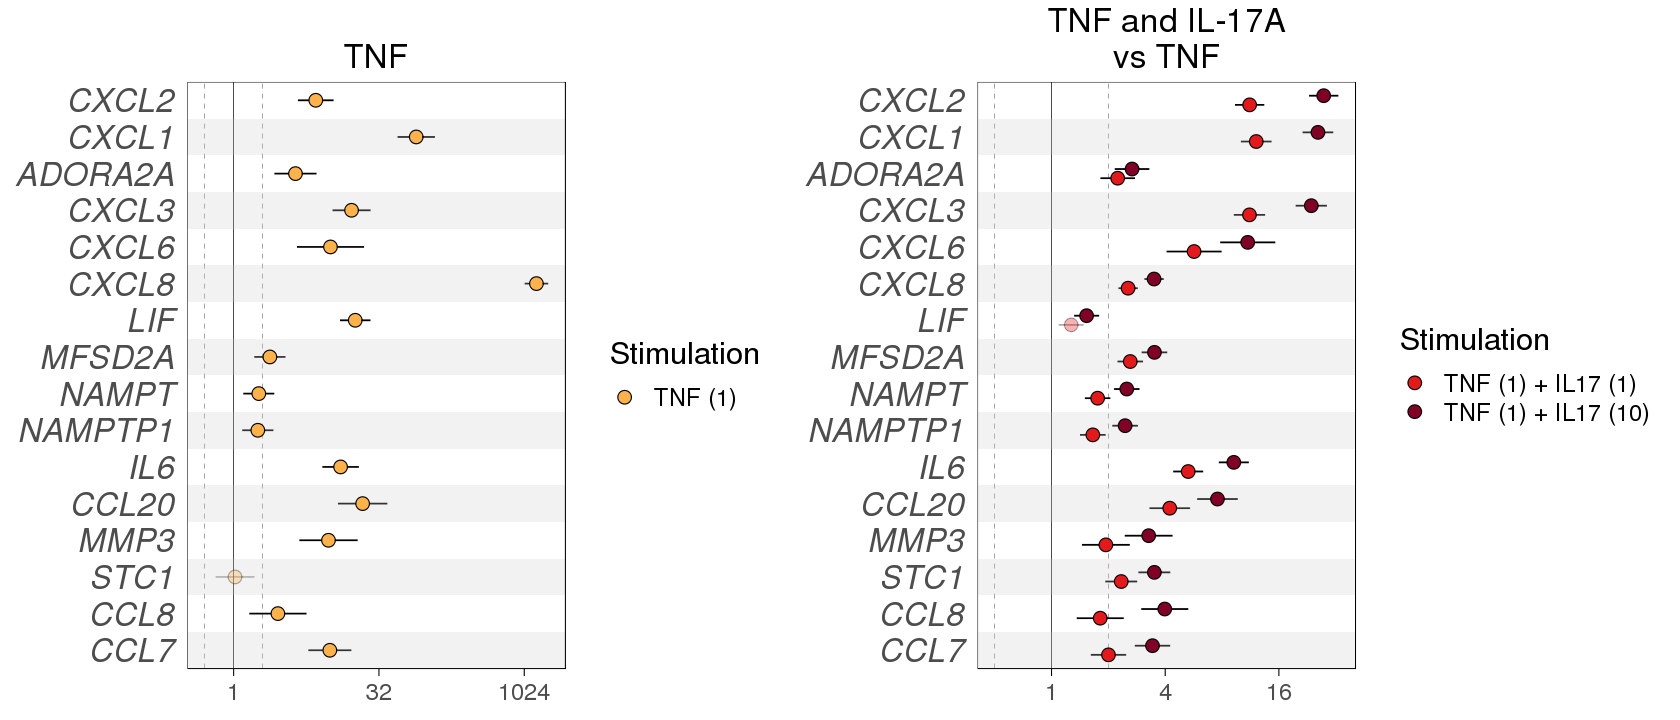

In [16]:
plot_coef <- function(fit1_top, coef = "t6", these_genes = c("RASD1", "CXCL1"), title = "TNF") {
  
#   fill_values <- meta_colors$Stimulation[["TNF (1)"]]
#   if (coef %in% c("d1", "d10")) {
#     fill_values <- meta_colors$Stimulation[["TNF (1)"]]
  
  d <- fit1_top %>%
  filter(ID %in% these_genes) %>%
  mutate(ID = factor(as.character(ID), these_genes)) %>%
  filter(Coef %in% c(coef)) %>%
  mutate(signif = adj.P.Val < 0.05)
  
  ggplot(d) +
  coord_flip() +
  geom_hline(yintercept = 0, size = 0.2) +
  geom_hline(yintercept = log2(c(1/2, 2)), size = 0.1, linetype = 2) +
  geom_errorbar(
    mapping = aes(x = ID, ymin = CI.L, ymax = CI.R, alpha = signif, group = Coef),
    width = 0,
    size = 0.5,
    position = position_dodge(width = 0.5)
  ) +
  annotate(
    geom = "rect",
    ymin = -Inf, ymax = Inf,
    xmin = seq(0.5, length(these_genes) - 0.5, by = 2),
    xmax = seq(0.5, length(these_genes) - 0.5, by = 2) + 1,
    fill = "grey80",
    alpha = 0.25
  ) +
  geom_point(
    mapping = aes(x = ID, y = logFC, alpha = signif, group = Coef, fill = Stimulation),
    position = position_dodge(width = 0.5),
    shape = 21, size = 3.5, stroke = 0.5
  ) +
  scale_fill_manual(values = meta_colors$Stimulation) +
  scale_alpha_manual(
    guide = FALSE,
    name = NULL,
    values = c(
      "TRUE" = 1,
      "FALSE" = 0.33
    )
  ) +
  guides(fill = guide_legend(override.aes = list(size = 3.5))) +
  scale_x_discrete(expand = c(0, 0.5)) +
  scale_y_continuous(
    labels = function(x) fractional(2^x),
    breaks = scales::pretty_breaks(3)
  ) +
  labs(title = title, y = NULL, x = NULL) +
  theme(
    legend.title = element_text(size = 18),
    plot.title = element_text(size = 20, hjust = 0.5),
    legend.position = "right",
    panel.grid.major = element_blank(),
    # panel.grid.major = element_line(size = 0.2, color = "grey80"),
    panel.spacing = unit(1, "lines"),
    axis.text.y = element_text(face = "italic", size = 20),
    axis.ticks.y = element_blank(),
    strip.text = element_text(face = "italic")
  )
}

# these_genes <- c("RASD1")
these_genes <- d_genes
p1 <- plot_coef(d1, coef = "t6", these_genes = these_genes)
p2 <- plot_coef(d1, coef = c("d1", "d10"), title = "TNF and IL-17A\nvs TNF", these_genes = these_genes)

options(repr.plot.width = 14, repr.plot.height = 2 + length(these_genes) * 0.25)

show_plot(p1 + p2)

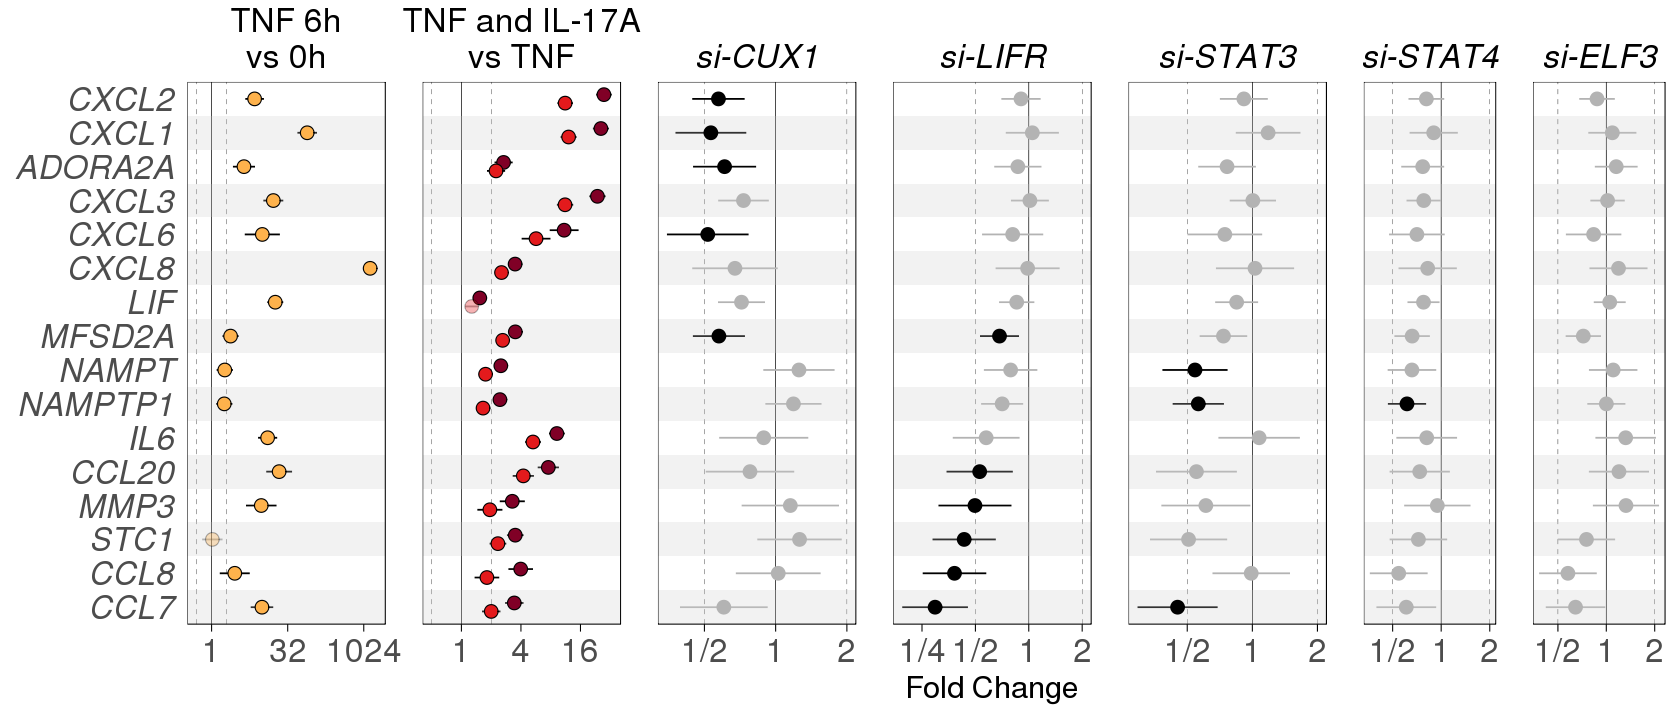

In [17]:
these_genes <- d_genes

p1 <- plot_coef(d1, coef = "t6", title = "TNF 6h\nvs 0h", these_genes = these_genes) +
  theme(
    legend.position = "none",
    axis.text.x = element_text(size = 20)
  )

p2 <- plot_coef(d1, coef = c("d1", "d10"), title = "TNF and IL-17A\nvs TNF", these_genes = these_genes) +
  theme(
    legend.position = "none",
    axis.ticks.y = element_blank(),
    axis.text.y = element_blank(),
    axis.text.x = element_text(size = 20)
  )

plot_sirna_effects4 <- function(d, these_genes, this_sirna) {
  d %>%
  dplyr::filter(Coef %in% this_sirna) %>%
  dplyr::filter(ID %in% c(these_genes)) %>%
  mutate(ID = factor(as.character(ID), these_genes)) %>%
  dplyr::select(Coef, ID, logFC, CI.L, CI.R, adj.P.Val) %>%
  reshape2::melt(id.vars = c("ID", "Coef")) %>%
  reshape2::dcast(formula = ID + Coef ~ variable, value.var = "value") %>%
  mutate(FC = 2 ^ logFC) %>%
  mutate(signif = adj.P.Val < 0.05) %>%
  ggplot() +
  coord_flip() +
  geom_hline(yintercept = 0, size = 0.2) +
  geom_hline(yintercept = log2(c(1/2, 2)), size = 0.1, linetype = 2) +
  geom_errorbar(
    mapping = aes(x = ID, ymin = CI.L, ymax = CI.R, color = signif),
    width = 0,
    size = 0.5
  ) +
  annotate(
    geom = "rect",
    ymin = -Inf, ymax = Inf,
    xmin = seq(0.5, length(these_genes) - 0.5, by = 2),
    xmax = seq(0.5, length(these_genes) - 0.5, by = 2) + 1,
    fill = "grey80",
    alpha = 0.25
  ) +
  geom_point(
    mapping = aes(x = ID, y = logFC, color = signif),
    size = 3.5, stroke = 0.5
  ) +
  scale_alpha_manual(
    guide = FALSE,
    name = NULL,
    values = c("TRUE" = 1, "FALSE" = 0.33)
  ) +
  scale_color_manual(
    guide = FALSE,
    name = NULL,
    values = c("TRUE" = "black", "FALSE" = "grey70")
  ) +
  scale_x_discrete(expand = c(0, 0.5)) +
  scale_y_continuous(
    labels = function(x) fractional(2^x),
    breaks = scales::pretty_breaks(3)
  ) +
  labs(title = this_sirna, y = NULL, x = NULL) +
  theme(
    legend.title = element_text(size = 18),
    plot.title = element_text(size = 20, face = "italic", hjust = 0.5),
    legend.position = "right",
    panel.grid.major = element_blank(),
    # panel.grid.major = element_line(size = 0.2, color = "grey80"),
    panel.spacing = unit(1, "lines"),
#     axis.text.y = element_text(face = "italic"),
    axis.ticks.y = element_blank(),
    axis.text.y = element_blank(),
    axis.text.x = element_text(size = 20),
    strip.text = element_text(face = "italic")
  )
}

p3 <- plot_sirna_effects4(d2, these_genes, "CUX1") + labs(title = "si-CUX1")
p4 <- plot_sirna_effects4(d2, these_genes, "LIFR") + labs(title = "si-LIFR", y = bquote("Fold Change"))
p5 <- plot_sirna_effects4(d2, these_genes, "STAT3") + labs(title = "si-STAT3")
p6 <- plot_sirna_effects4(d2, these_genes, "STAT4") + labs(title = "si-STAT4")
p7 <- plot_sirna_effects4(d2, these_genes, "ELF3") + labs(title = "si-ELF3")

# options(repr.plot.width = 9, repr.plot.height = 1 + length(these_genes) * 0.35)
options(repr.plot.width = 14, repr.plot.height = 2 + length(these_genes) * 0.25)

show_plot(name = "rnaseq-data-2-fig2",
  p1 + p2 + p3 + p4 + p5 + p6 + p7 +
  patchwork::plot_layout(nrow = 1, widths = c(1.5, 1.5, 1.5, 1.5, 1.5, 1, 1)),
)

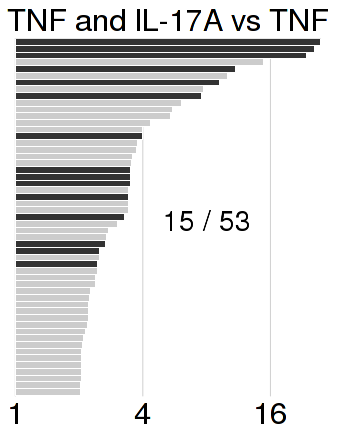

In [18]:

x <- d1 %>%
filter(Coef == "d10") %>%
filter(logFC > 0) %>%
arrange(P.Value) %>%
filter(signif)

options(repr.plot.width = 3, repr.plot.height = 2 + nrow(x) * 0.03)

ggplot(x, aes(x = reorder(ID, logFC), y = logFC, fill = ID %in% d_genes)) +
geom_col(width = 1, color = "white", size = 0.2) +
coord_flip() +
labs(x = NULL, y = NULL, title = "TNF and IL-17A vs TNF") +
theme_void() +
annotate(
  geom = "text",
  y = log2(8),
  x = nrow(x) / 2,
  label = sprintf("%s / %s", sum(x$ID %in% d_genes), nrow(x)),
  size = 6
) +
scale_fill_manual(values = c("TRUE" = "grey20", "FALSE" = "grey80")) +
scale_y_continuous(breaks = scales::pretty_breaks(3), labels = function(x) fractional(2 ^ x)) +
theme(
  plot.title = element_text(size = 18, hjust = 0.5),
  plot.margin = margin(l = 0, r = 1, unit = "lines"),
  panel.grid.major.x = element_line(size = 0.2, color = "grey80"),
  axis.text.x = element_text(size = 18),
  axis.ticks.y = element_blank(),
#   axis.text.y = element_text(size = 4),
  axis.text.y = element_blank(),
  legend.position = "none"
)

CXCL1, CXCL2, CXCL3, CXCL6, CXCL8, and NMES1 (C15orf48) (mean fold-change 1.7, 95% CI: 1.2, 2.2)

# Gene categories (C1, C2, C3, C4, C5)


In [19]:
cats <- readRDS("analysis/limma/cats.rds")

print(sapply(cats, length))

   C1    C2    C3    C4    C5  None 
   26    25   370    13   202 19243 


In [20]:
d2$category <- 0
d2$category[d2$ensembl_id %in% cats$C1] <- 1
d2$category[d2$ensembl_id %in% cats$C2] <- 2
d2$category[d2$ensembl_id %in% cats$C3] <- 3
d2$category[d2$ensembl_id %in% cats$C4] <- 4
d2$category[d2$ensembl_id %in% cats$C5] <- 5

table(d2$category)


     0      1      2      3      4      5 
339024    312    300   4440    156   2424 

Coef,category,induced,repressed
si-CUX1,C1 (n = 26),0,0
si-CUX1,C2 (n = 25),2,5
si-CUX1,C3 (n = 370),10,7
si-CUX1,C4 (n = 13),0,2
si-CUX1,C5 (n = 202),26,1
si-ELF3,C1 (n = 26),0,0


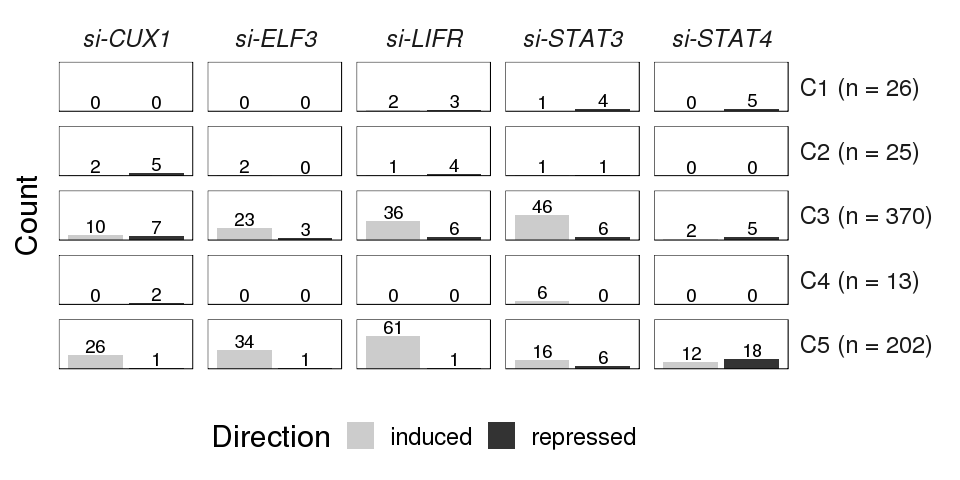

In [28]:
x <- d2 %>%
filter(category != 0) %>%
filter(Coef %in% c("CUX1", "LIFR", "STAT3", "STAT4", "ELF3")) %>%
group_by(Coef, category) %>% 
summarize(
  induced = sum(logFC > log2(1.5) & adj.P.Val < 0.05),
  repressed = sum(logFC < log2(1 / 1.5) & adj.P.Val < 0.05),
)

xx <- local({
  x <- d2 %>%
    filter(category != 0) %>%
    dplyr::select(ensembl_id, category) %>%
    unique() %>% 
    count(category) %>%
    mutate(category_label = sprintf("C%s (n = %s)", category, scales::comma(n)))
  xx <- unlist(split(x$category_label, x$category))
  xx[["0"]] <- "NA"
  return(xx)
})
x$category <- xx[x$category]
x$Coef <- sprintf("si-%s", x$Coef)

x %>% head

options(repr.plot.width = 8, repr.plot.height = 4)

p <- x %>% gather(key = "direction", value = "count", induced, repressed) %>%
ggplot() +
aes(x = direction, y = count, fill = direction) +
geom_col() +
# geom_text(aes(label = signif(count * 100, 2)), vjust = -0.1) +
geom_text(aes(label = count), vjust = -0.15) +
# coord_flip() +
facet_grid(category ~ Coef) + #, scales = "free") +
scale_fill_manual(values = c("grey80", "grey20")) +
guides(fill = guide_legend(title = "Direction")) +
scale_y_continuous(expand = expand_scale(mult = c(0, 0.5))) +
labs(x = NULL, y = "Count") +
theme(
  legend.position = "bottom",
  strip.text.x = element_text(face = "italic"),
  strip.text.y = element_text(angle = 0, hjust = 0),
  axis.text = element_blank(),
  axis.ticks = element_blank()
)

show_plot(p)

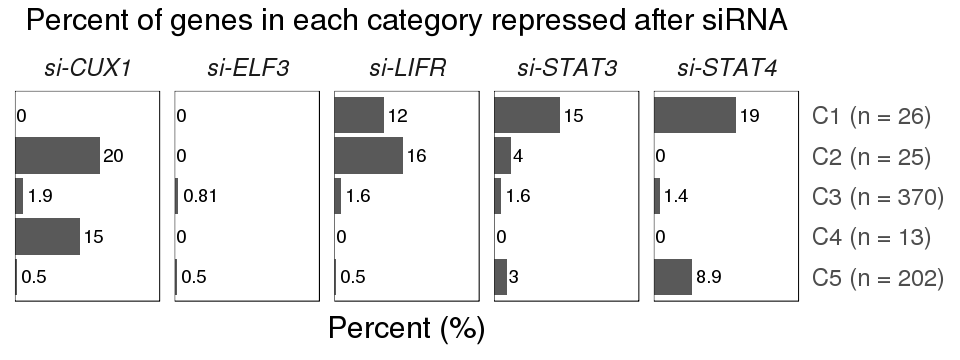

In [97]:
fdr_threshold <- 0.05

x <- d2 %>%
filter(category != 0) %>%
filter(Coef %in% c("CUX1", "LIFR", "STAT3", "STAT4", "ELF3")) %>%
group_by(Coef, category) %>% 
summarize(
  induced = sum(logFC > log2(1.5) & adj.P.Val < fdr_threshold),
  repressed = sum(logFC < log2(1 / 1.5) & adj.P.Val < fdr_threshold),
  total = length(logFC)
)

xx <- local({
  x <- d2 %>%
    filter(category != 0) %>%
    dplyr::select(ensembl_id, category) %>%
    unique() %>% 
    count(category) %>%
    mutate(
      category_label = sprintf("C%s (n = %s)", category, scales::comma(n))
    )
  xx <- unlist(split(x$category_label, x$category))
  xx[["0"]] <- "NA"
  return(xx)
})
x$category <- xx[x$category]
x$Coef <- sprintf("si-%s", x$Coef)

options(repr.plot.width = 8, repr.plot.height = 3)

x <- x %>% mutate(
  pct_induced = 100 * induced / total,
  pct_repressed = 100 * repressed / total
)

p <- ggplot(x) +
aes(x = fct_rev(category), y = pct_repressed) +
facet_grid(~ Coef) +
geom_col() +
coord_flip() +
geom_text(aes(label = sprintf("%s", signif(pct_repressed, 2))), hjust = -0.15) +
scale_x_discrete(position = "top") +
scale_y_continuous(breaks = scales::pretty_breaks(2), expand = expand_scale(mult = c(0, 0.7))) +
labs(x = NULL, y = "Percent (%)", title = "Percent of genes in each category repressed after siRNA") +
theme(
  legend.position = "bottom",
  strip.text.x = element_text(face = "italic"),
  strip.text.y = element_text(angle = 0, hjust = 0),
  axis.text.x = element_blank(),
  axis.ticks = element_blank()
)

show_plot(p)

# Target genes for CUX1, ELF3, LIFR, STAT3, STAT4


In [34]:
targets <- lapply(c("CUX1", "LIFR", "ELF3", "STAT3", "STAT4"), function(this_coef) {
  (
    d2 %>%
    filter(Coef == this_coef) %>%
    filter(category != 0) %>%
    filter(logFC < log2(1 / 1.5) & adj.P.Val < 0.05) %>%
    dplyr::select(ensembl_id)
  )$ensembl_id
})

In [35]:
sapply(targets, length)

[1] 15 14  4 17 28

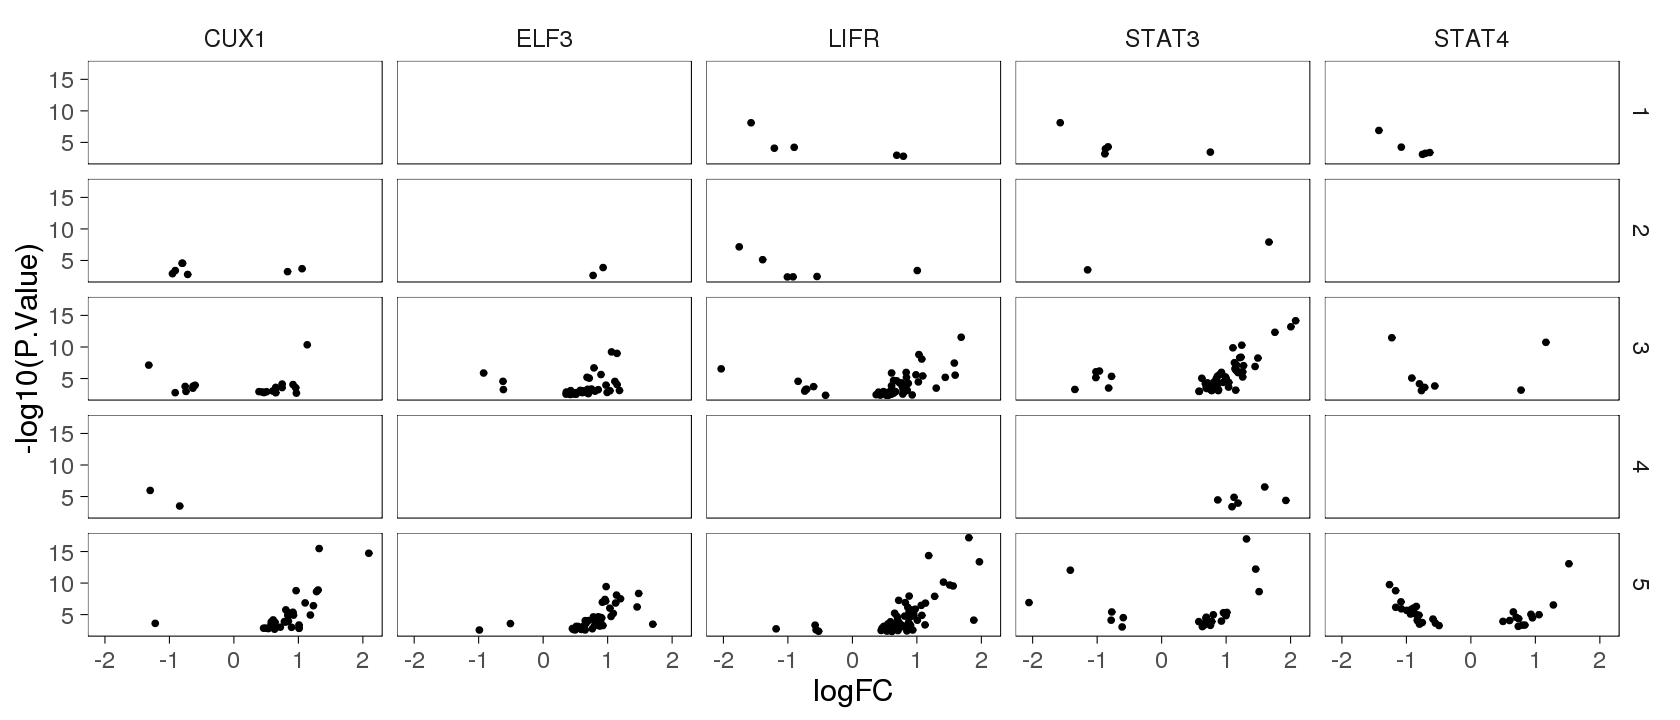

In [568]:
p <- d2 %>% filter(category != 0) %>%
filter(Coef %in% c("CUX1", "LIFR", "STAT3", "STAT4", "ELF3")) %>%
filter(adj.P.Val < 0.05) %>%
group_by(Coef, category) %>%
ggplot() +
aes(x = logFC, y = -log10(P.Value)) +
geom_point() +
facet_grid(category ~ Coef)

show_plot(p)

In [209]:
library(magrittr)

In [210]:
d2 %<>%
mutate(
  FC = 2^logFC,
  FC.R = 2^CI.R,
  FC.L = 2^CI.L
)

In [211]:
# these_genes <- c("CXCL1", "CXCL2", "CXCL3", "CXCL6", "CXCL8", "C15orf48")
these_genes <- c("CXCL1", "CXCL2", "CXCL3", "CXCL6", "CXCL8")

d2 %>%
filter(Coef == "CUX1", ID %in% these_genes) %>%
select(FC, FC.R, FC.L) %>%
summarise_all(function(x) signif(mean(x), 2))

FC,FC.R,FC.L
0.61,0.84,0.44


In [212]:
d2 %>%
filter(Coef %in% c("LIFR", "STAT3", "STAT4", "ELF3"), ID %in% these_genes) %>%
select(FC, FC.R, FC.L) %>%
summarise_all(function(x) signif(mean(x), 2))

FC,FC.R,FC.L
0.93,1.3,0.67


In [213]:
these_genes <- c("TNFRSF1A")

d2 %>% filter(ID %in% these_genes) %>% arrange(P.Value)

d2 %>%
filter(Coef == "CUX1", ID %in% these_genes) %>%
select(FC, FC.R, FC.L) %>%
summarise_all(function(x) signif(mean(x), 2))
              
d2 %>%
filter(Coef %in% c("LIFR", "STAT3", "STAT4", "ELF3"), ID %in% these_genes) %>%
select(FC, FC.R, FC.L) %>%
summarise_all(function(x) signif(mean(x), 2))

ID,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,B,ensembl_id,Coef,FC,FC.R,FC.L
TNFRSF1A,7.3223,6.9958,7.6488,7.0622,44.2524,4.001e-99,1.120e-97,216.0797,ENSG00000067182,Intercept,160.0412509,200.6865333,127.6279060
TNFRSF1A,-0.7724,-1.1494,-0.3954,7.0622,-4.0426,7.804e-05,1.275e-03,0.9104,ENSG00000067182,d1t16,0.5854427,0.7602786,0.4508127
TNFRSF1A,-0.6200,-0.9970,-0.2430,7.0622,-3.2449,1.399e-03,3.550e-02,-1.3629,ENSG00000067182,CUX1,0.6506709,0.8449864,0.5010408
TNFRSF1A,-0.4520,-0.8290,-0.0750,7.0622,-2.3657,1.910e-02,2.668e-01,-3.6151,ENSG00000067182,STAT3,0.7310287,0.9493421,0.5629193
TNFRSF1A,0.3924,0.0154,0.7693,7.0622,2.0535,4.150e-02,2.337e-01,-4.2991,ENSG00000067182,ELF3,1.3125751,1.7044426,1.0107316
TNFRSF1A,-0.2187,-0.5957,0.1583,7.0622,-1.1448,2.538e-01,8.074e-01,-5.5981,ENSG00000067182,STAT4,0.8593394,1.1159714,0.6617233
TNFRSF1A,-0.1948,-0.5718,0.1822,7.0622,-1.0197,3.093e-01,6.539e-01,-6.5741,ENSG00000067182,d1t6,0.8736940,1.1346128,0.6727769
TNFRSF1A,0.1845,-0.1925,0.5615,7.0622,0.9657,3.355e-01,9.144e-01,-6.2257,ENSG00000067182,d1t1,1.1364231,1.4758028,0.8750880
TNFRSF1A,-0.1276,-0.5046,0.2494,7.0622,-0.6677,5.051e-01,8.149e-01,-6.7281,ENSG00000067182,d0t16,0.9153529,1.1887126,0.7048558
TNFRSF1A,-0.1024,-0.4794,0.2746,7.0622,-0.5357,5.928e-01,8.671e-01,-6.9365,ENSG00000067182,d0t6,0.9314821,1.2096587,0.7172759


FC,FC.R,FC.L
0.65,0.84,0.5


FC,FC.R,FC.L
0.99,1.3,0.76


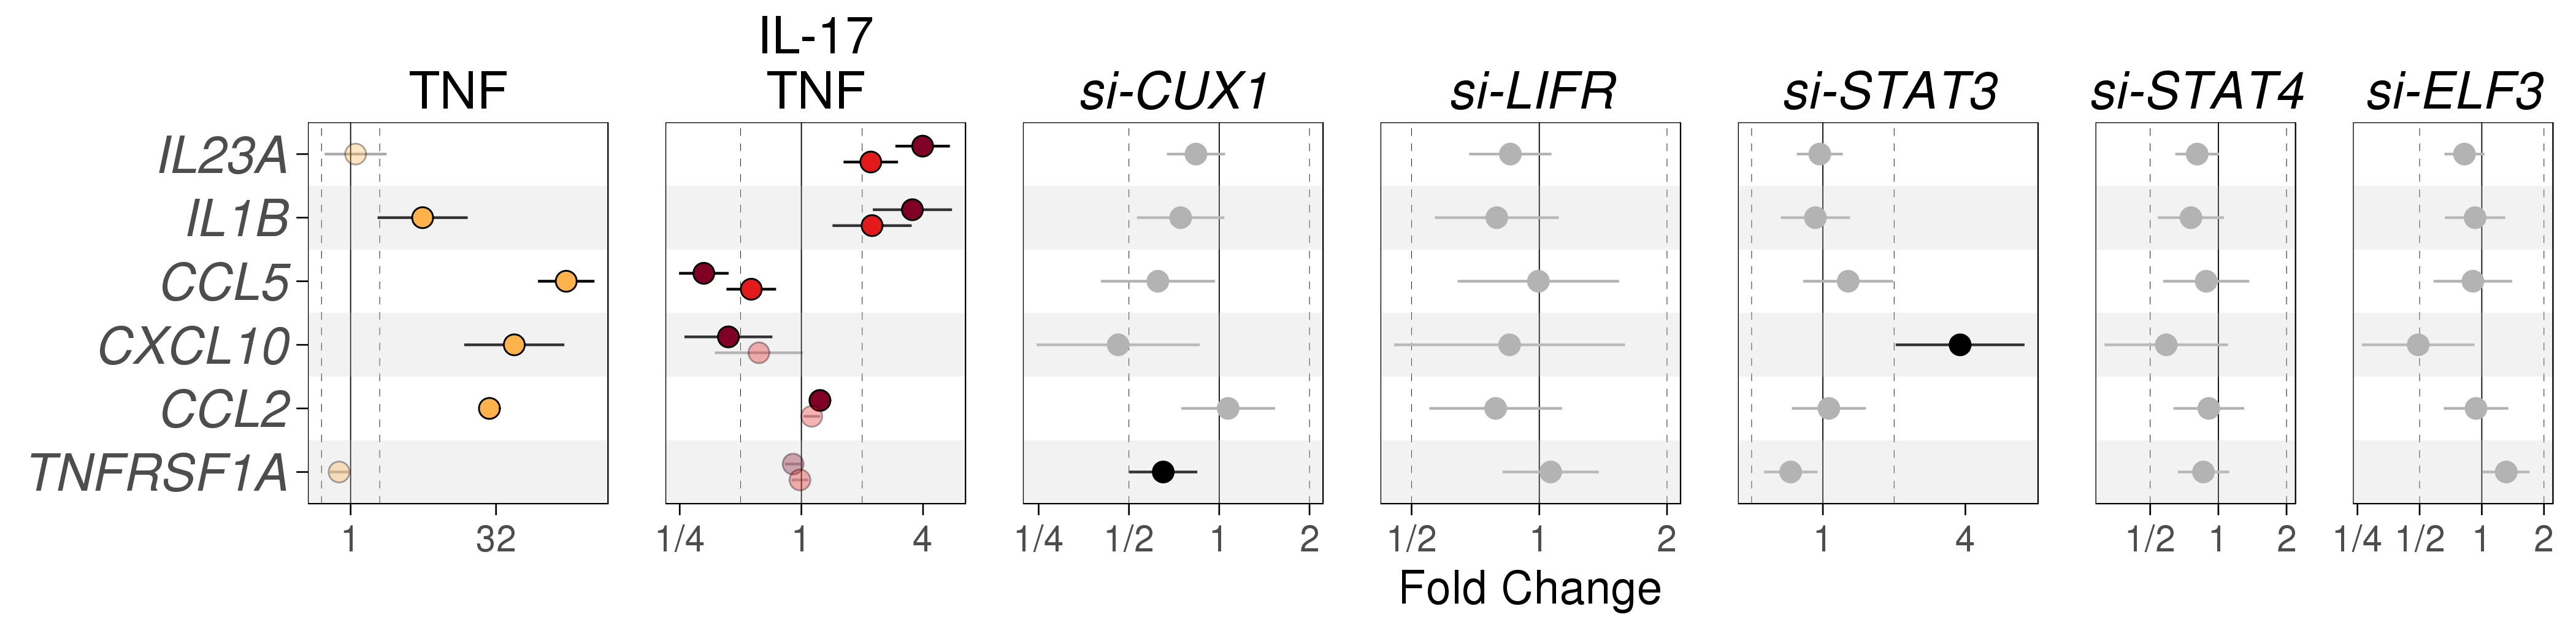

In [269]:
these_genes <- c("TNFRSF1A", "CCL2", "CXCL10", "CCL5", "IL1B", "IL23A")

p1 <- plot_coef(d1, coef = "t6", these_genes = these_genes) +
  theme(legend.position = "none")

p2 <- plot_coef(d1, coef = c("d1", "d10"), title = "IL-17\nTNF", these_genes = these_genes) +
  theme(
    legend.position = "none",
    axis.ticks.y = element_blank(),
    axis.text.y = element_blank()
  )

p3 <- plot_sirna_effects4(d2, these_genes, "CUX1") + labs(title = "si-CUX1")
p4 <- plot_sirna_effects4(d2, these_genes, "LIFR") + labs(title = "si-LIFR", y = bquote("Fold Change"))
p5 <- plot_sirna_effects4(d2, these_genes, "STAT3") + labs(title = "si-STAT3")
p6 <- plot_sirna_effects4(d2, these_genes, "STAT4") + labs(title = "si-STAT4")
p7 <- plot_sirna_effects4(d2, these_genes, "ELF3") + labs(title = "si-ELF3")

# options(repr.plot.width = 9, repr.plot.height = 1 + length(these_genes) * 0.35)
options(repr.plot.width = 14, repr.plot.height = 2 + length(these_genes) * 0.24)

show_plot(
  p1 + p2 + p3 + p4 + p5 + p6 + p7 +
  patchwork::plot_layout(nrow = 1, widths = c(1.5, 1.5, 1.5, 1.5, 1.5, 1, 1)),
  res = 300
)

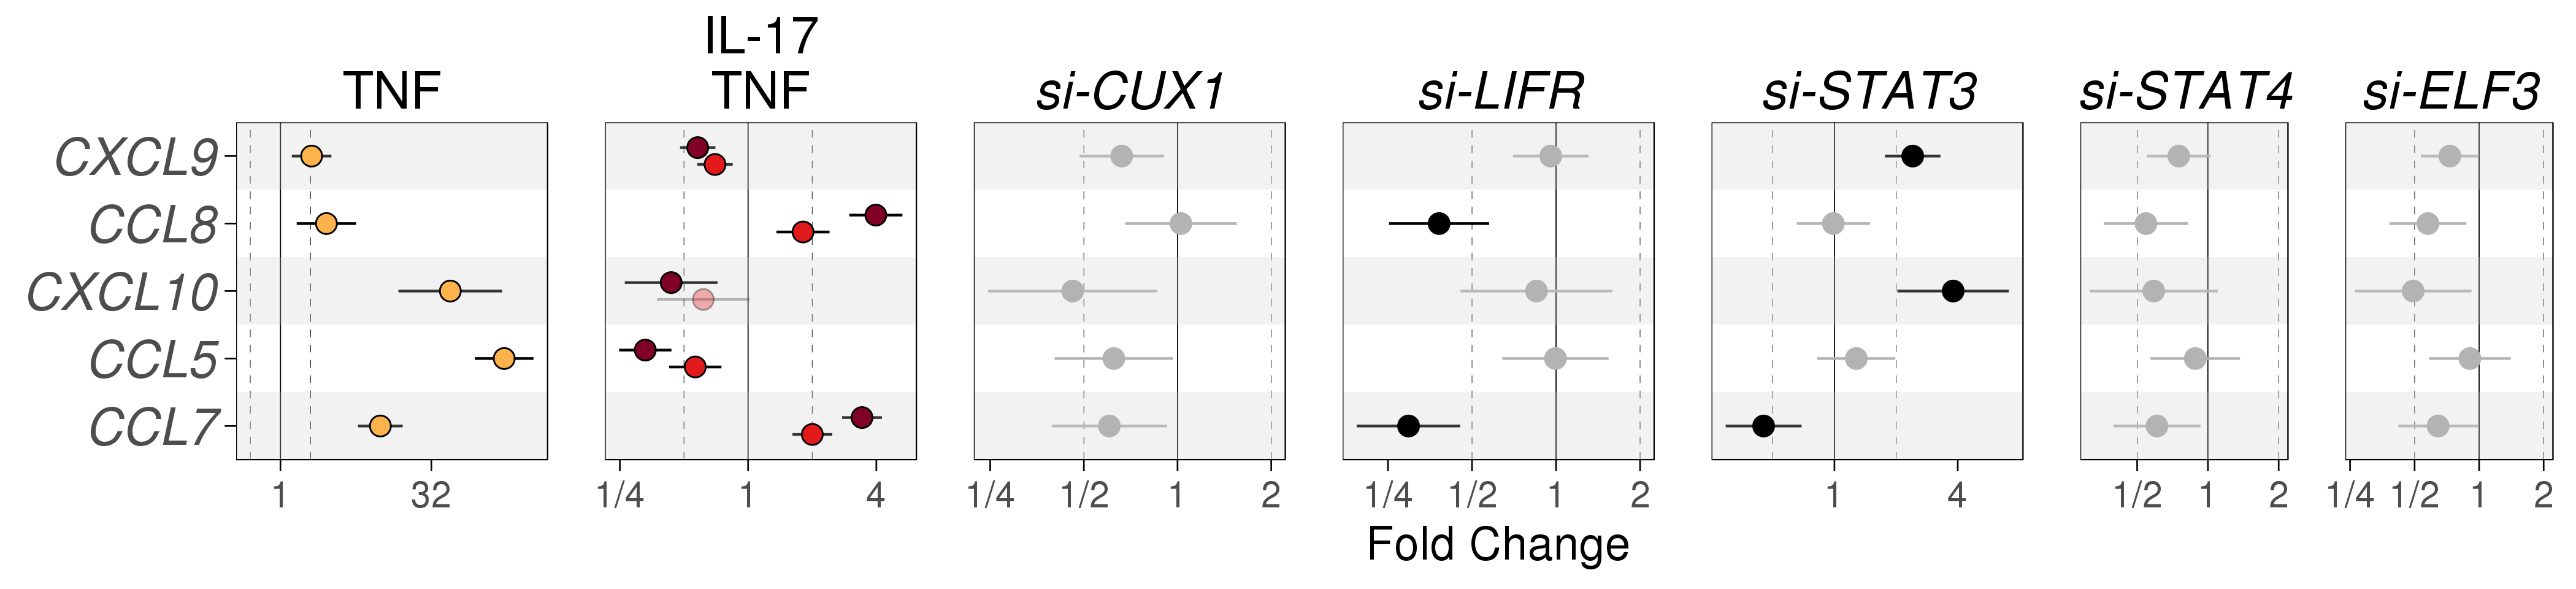

In [215]:
these_genes <- c("CCL7", "CCL5", "CXCL10", "CCL8", "CXCL9")

p1 <- plot_coef(d1, coef = "t6", these_genes = these_genes) +
  theme(legend.position = "none")

p2 <- plot_coef(d1, coef = c("d1", "d10"), title = "IL-17\nTNF", these_genes = these_genes) +
  theme(
    legend.position = "none",
    axis.ticks.y = element_blank(),
    axis.text.y = element_blank()
  )

p3 <- plot_sirna_effects4(d2, these_genes, "CUX1") + labs(title = "si-CUX1")
p4 <- plot_sirna_effects4(d2, these_genes, "LIFR") + labs(title = "si-LIFR", y = bquote("Fold Change"))
p5 <- plot_sirna_effects4(d2, these_genes, "STAT3") + labs(title = "si-STAT3")
p6 <- plot_sirna_effects4(d2, these_genes, "STAT4") + labs(title = "si-STAT4")
p7 <- plot_sirna_effects4(d2, these_genes, "ELF3") + labs(title = "si-ELF3")

# options(repr.plot.width = 9, repr.plot.height = 1 + length(these_genes) * 0.35)
options(repr.plot.width = 14, repr.plot.height = 2 + length(these_genes) * 0.24)

show_plot(
  p1 + p2 + p3 + p4 + p5 + p6 + p7 +
  patchwork::plot_layout(nrow = 1, widths = c(1.5, 1.5, 1.5, 1.5, 1.5, 1, 1)),
  res = 300
)

In [216]:
these_genes <- c("CXCL10", "CCL5")

d2 %>%
filter(Coef == "CUX1", ID %in% these_genes) %>%
select(FC, FC.R, FC.L) %>%
summarise_all(function(x) signif(mean(x), 2))

FC,FC.R,FC.L
0.54,0.91,0.32


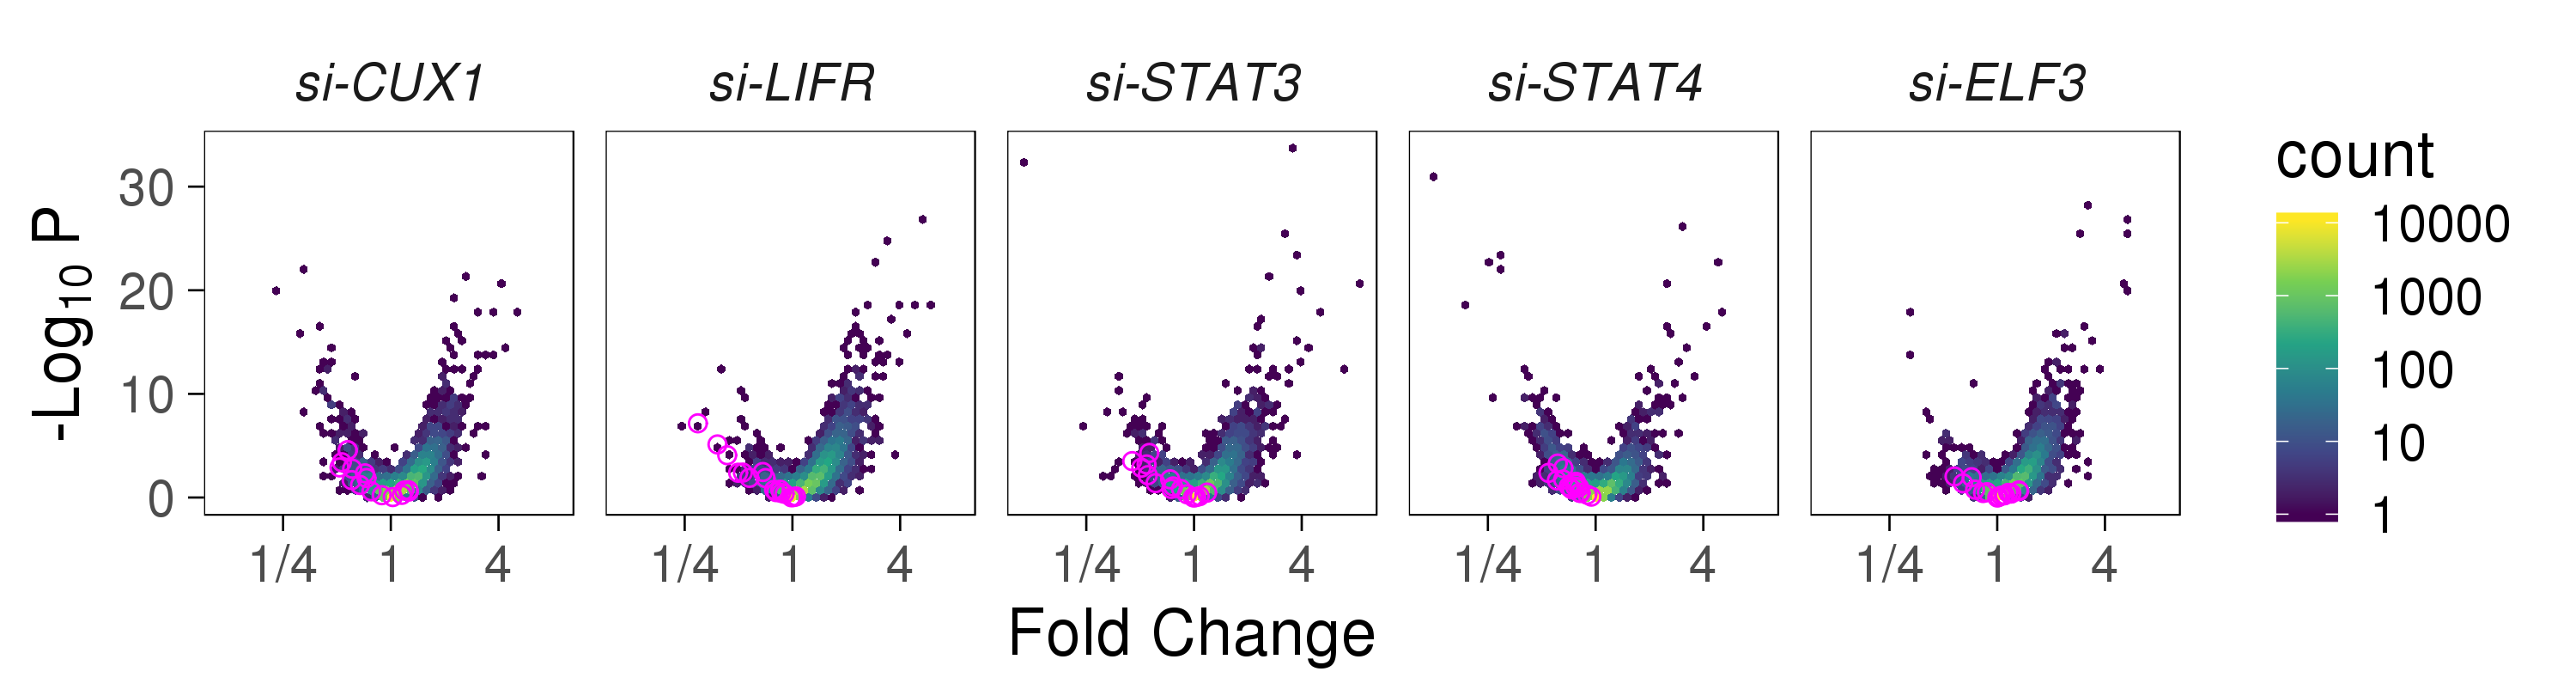

In [236]:
x <- d2 %>%
filter(Coef %in% sirnas) %>%
filter(!(Coef == "CUX1" & ID == "PRG4")) %>%
mutate(logP = -log10(P.Value)) %>%
mutate(Coef = sprintf("si-%s", Coef)) %>%
mutate(Coef = fct_relevel(Coef, sprintf("si-%s", sirnas)))
# group_by(Coef)
# top_n(n = 5000, wt = 1/P.Value)

options(repr.plot.width = 5 * 2, repr.plot.height = 2.7)

p <- ggplot(mapping = aes(logFC, logP)) +
geom_hex(data = x, bins = 42, size = 0) +
geom_point(data = x %>% filter(ID %in% d_genes), size = 2, shape = 21, color = "#ff00ff") +
scale_fill_viridis_c(option = 7, trans = "log10", breaks = c(1, 10, 100, 1000, 10000)) +
facet_grid(~ Coef) +
scale_x_continuous(labels = function(x) fractional(2^x)) +
labs(x = "Fold Change", y = bquote("-Log"[10]~"P")) +
theme(strip.text = element_text(face = "italic"))

show_plot(p, res = 300)

ensembl_id,ID.x,logFC.x,CI.L.x,CI.R.x,AveExpr.x,t.x,P.Value.x,adj.P.Val.x,B.x,⋯,CI.R.y,AveExpr.y,t.y,P.Value.y,adj.P.Val.y,B.y,Coef.y,FC,FC.R,FC.L
ENSG00000000971,CFH,-0.2788,-0.4337,-0.1239,5.6342,-3.5527,0.0004958,0.009264,-0.7689,⋯,0.9138,6.1393,1.4853,0.13920,0.4997,-5.2813,CUX1,1.3126661,1.884001,0.9145285
ENSG00000000971,CFH,-0.2788,-0.4337,-0.1239,5.6342,-3.5527,0.0004958,0.009264,-0.7689,⋯,0.9929,6.1393,1.7848,0.07600,0.3303,-4.7911,ELF3,1.3866465,1.990181,0.9660702
ENSG00000000971,CFH,-0.2788,-0.4337,-0.1239,5.6342,-3.5527,0.0004958,0.009264,-0.7689,⋯,0.4742,6.1393,-0.1782,0.85880,1.0000,-6.2143,STAT4,0.9678799,1.389148,0.6743643
ENSG00000000971,CFH,-0.2788,-0.4337,-0.1239,5.6342,-3.5527,0.0004958,0.009264,-0.7689,⋯,0.6711,6.1393,0.5669,0.57150,0.9064,-6.1358,STAT3,1.1094157,1.592287,0.7729784
ENSG00000000971,CFH,-0.2788,-0.4337,-0.1239,5.6342,-3.5527,0.0004958,0.009264,-0.7689,⋯,0.8976,6.1393,1.4241,0.15610,0.4408,-5.3958,LIFR,1.2980087,1.862964,0.9043167
ENSG00000001630,CYP51A1,-0.2474,-0.3716,-0.1232,6.3208,-3.9333,0.0001226,0.003036,0.5360,⋯,0.9676,6.0784,3.1615,0.00184,0.0422,-1.6091,CUX1,1.5113104,1.955585,1.1679674


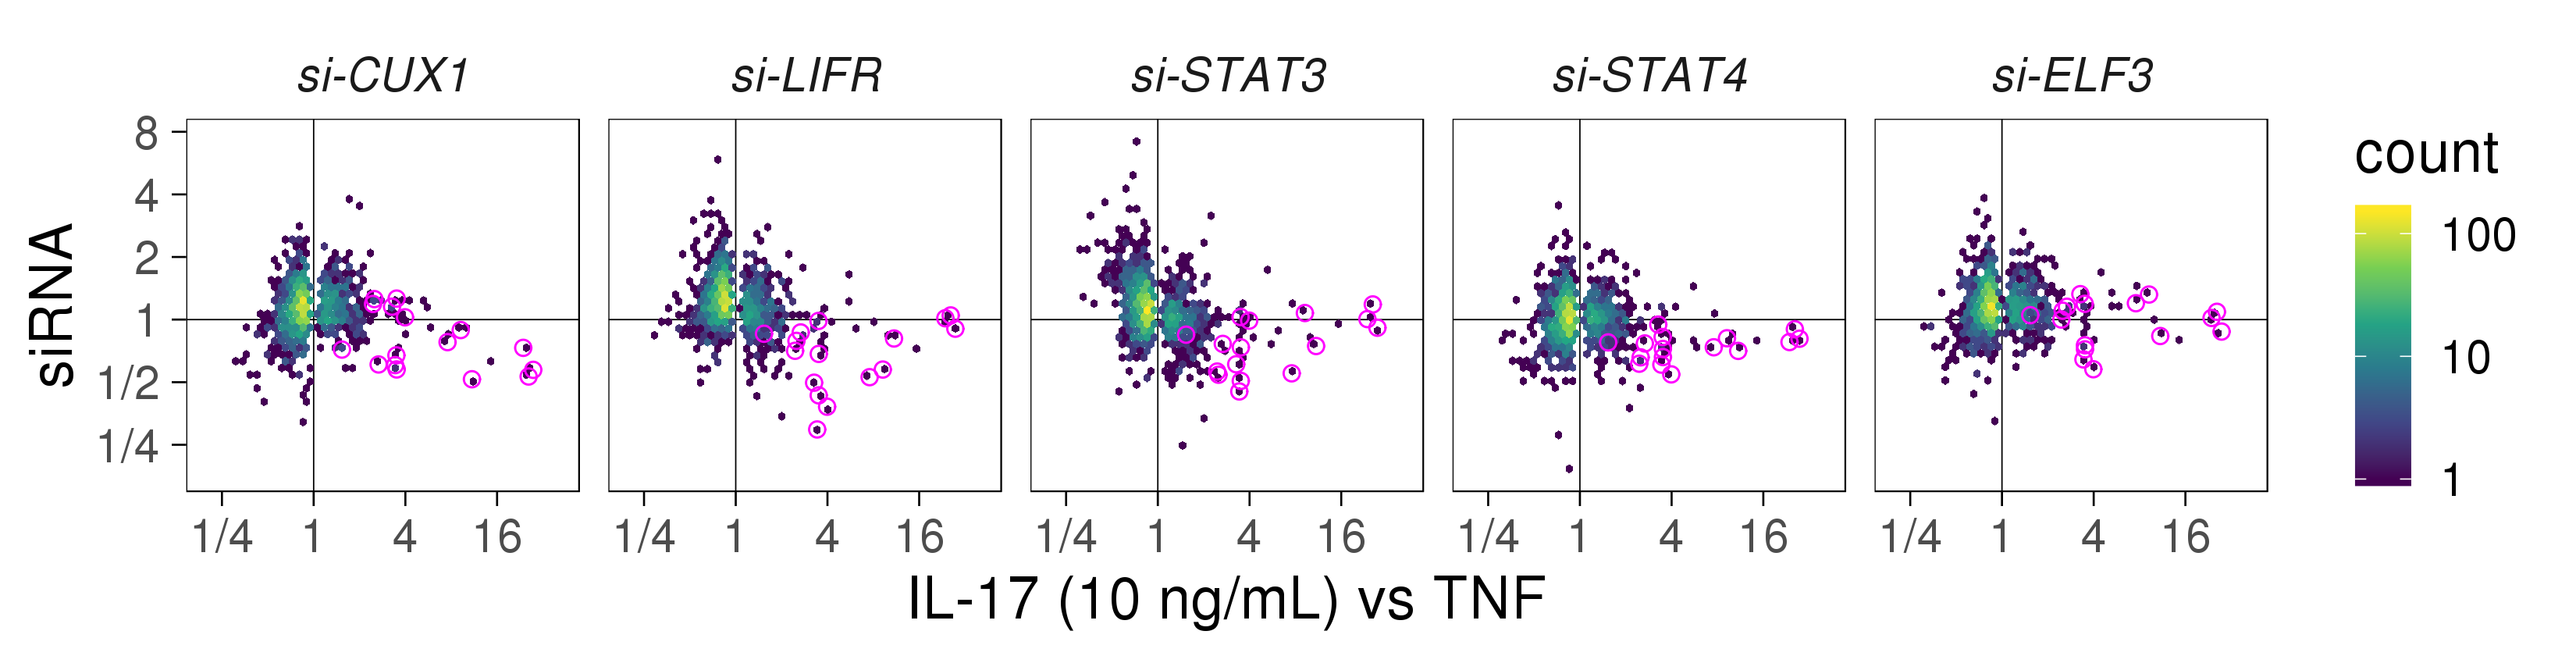

In [381]:
x <- merge(
  x = d1 %>% filter(Coef == "d10", adj.P.Val < 0.05),
  y = d2 %>% filter(Coef %in% sirnas),
  by = "ensembl_id"
)
head(x)

x %<>%
mutate(Coef.y = sprintf("si-%s", Coef.y)) %>%
mutate(Coef.y = fct_relevel(Coef.y, sprintf("si-%s", sirnas)))

options(repr.plot.width = 1 * 5 * 2.2, repr.plot.height = 1 * 2.8)

p <- ggplot(x, aes(x = logFC.x, y = logFC.y)) +
geom_hline(yintercept = 0, size = 0.2) +
geom_vline(xintercept = 0, size = 0.2) +
geom_hex(data = x, bins = 42, size = 0) + #, binwidth = c(0.15, 0.2)) +
geom_point(data = x %>% filter(ID.x %in% d_genes), size = 2, shape = 21, color = "#ff00ff") +
# geom_text_repel(
# #   data = x %>% filter(Coef.y == "si-CUX1" & logFC.y < log2(1/1.7) & logFC.x > log2(4)),
#   data = x %>%
#     filter(Coef.y == "si-CUX1") %>%
#     mutate(ID.x = if_else(Coef.y == "si-CUX1" & logFC.y < log2(1/1.7) & logFC.x > log2(4), ID.x, "")),
#   mapping = aes(label = ID.x), nudge_y = -0.8, segment.size = 0.1, size = 3, fontface = "italic"
# ) +
# geom_text_repel(
# #   data = x %>% filter(Coef.y == "si-LIFR" & logFC.y < log2(1/1.7) & logFC.x > log2(3)),
#   data = x %>%
#     filter(Coef.y == "si-LIFR") %>%
#     mutate(ID.x = if_else(Coef.y == "si-LIFR" & logFC.y < log2(1/1.7) & logFC.x > log2(3), ID.x, "")),
#   mapping = aes(label = ID.x), nudge_y = -0.8, direction = "y", segment.size = 0.1, size = 3, fontface = "italic"
# ) +
scale_fill_viridis_c(option = 7, trans = "log10", breaks = c(1, 10, 100, 1000, 10000)) +
facet_grid(~ Coef.y) +
scale_x_continuous(labels = function(x) fractional(2^x), expand = c(0, 1)) +
scale_y_continuous(labels = function(x) fractional(2^x), expand = c(0.05, 0.1)) +
labs(x = "IL-17 (10 ng/mL) vs TNF", y = "siRNA") +
theme(strip.text = element_text(face = "italic"))
                   
show_plot(p, res = 300)

ensembl_id,ID.x,logFC.x,CI.L.x,CI.R.x,AveExpr.x,t.x,P.Value.x,adj.P.Val.x,B.x,⋯,CI.R.y,AveExpr.y,t.y,P.Value.y,adj.P.Val.y,B.y,Coef.y,FC,FC.R,FC.L
ENSG00000000971,CFH,-0.2788,-0.4337,-0.1239,5.6342,-3.5527,0.0004958,0.009264,-0.7689,⋯,0.9138,6.1393,1.4853,0.13920,0.4997,-5.2813,CUX1,1.3126661,1.884001,0.9145285
ENSG00000000971,CFH,-0.2788,-0.4337,-0.1239,5.6342,-3.5527,0.0004958,0.009264,-0.7689,⋯,0.9929,6.1393,1.7848,0.07600,0.3303,-4.7911,ELF3,1.3866465,1.990181,0.9660702
ENSG00000000971,CFH,-0.2788,-0.4337,-0.1239,5.6342,-3.5527,0.0004958,0.009264,-0.7689,⋯,0.4742,6.1393,-0.1782,0.85880,1.0000,-6.2143,STAT4,0.9678799,1.389148,0.6743643
ENSG00000000971,CFH,-0.2788,-0.4337,-0.1239,5.6342,-3.5527,0.0004958,0.009264,-0.7689,⋯,0.6711,6.1393,0.5669,0.57150,0.9064,-6.1358,STAT3,1.1094157,1.592287,0.7729784
ENSG00000000971,CFH,-0.2788,-0.4337,-0.1239,5.6342,-3.5527,0.0004958,0.009264,-0.7689,⋯,0.8976,6.1393,1.4241,0.15610,0.4408,-5.3958,LIFR,1.2980087,1.862964,0.9043167
ENSG00000001630,CYP51A1,-0.2474,-0.3716,-0.1232,6.3208,-3.9333,0.0001226,0.003036,0.5360,⋯,0.9676,6.0784,3.1615,0.00184,0.0422,-1.6091,CUX1,1.5113104,1.955585,1.1679674


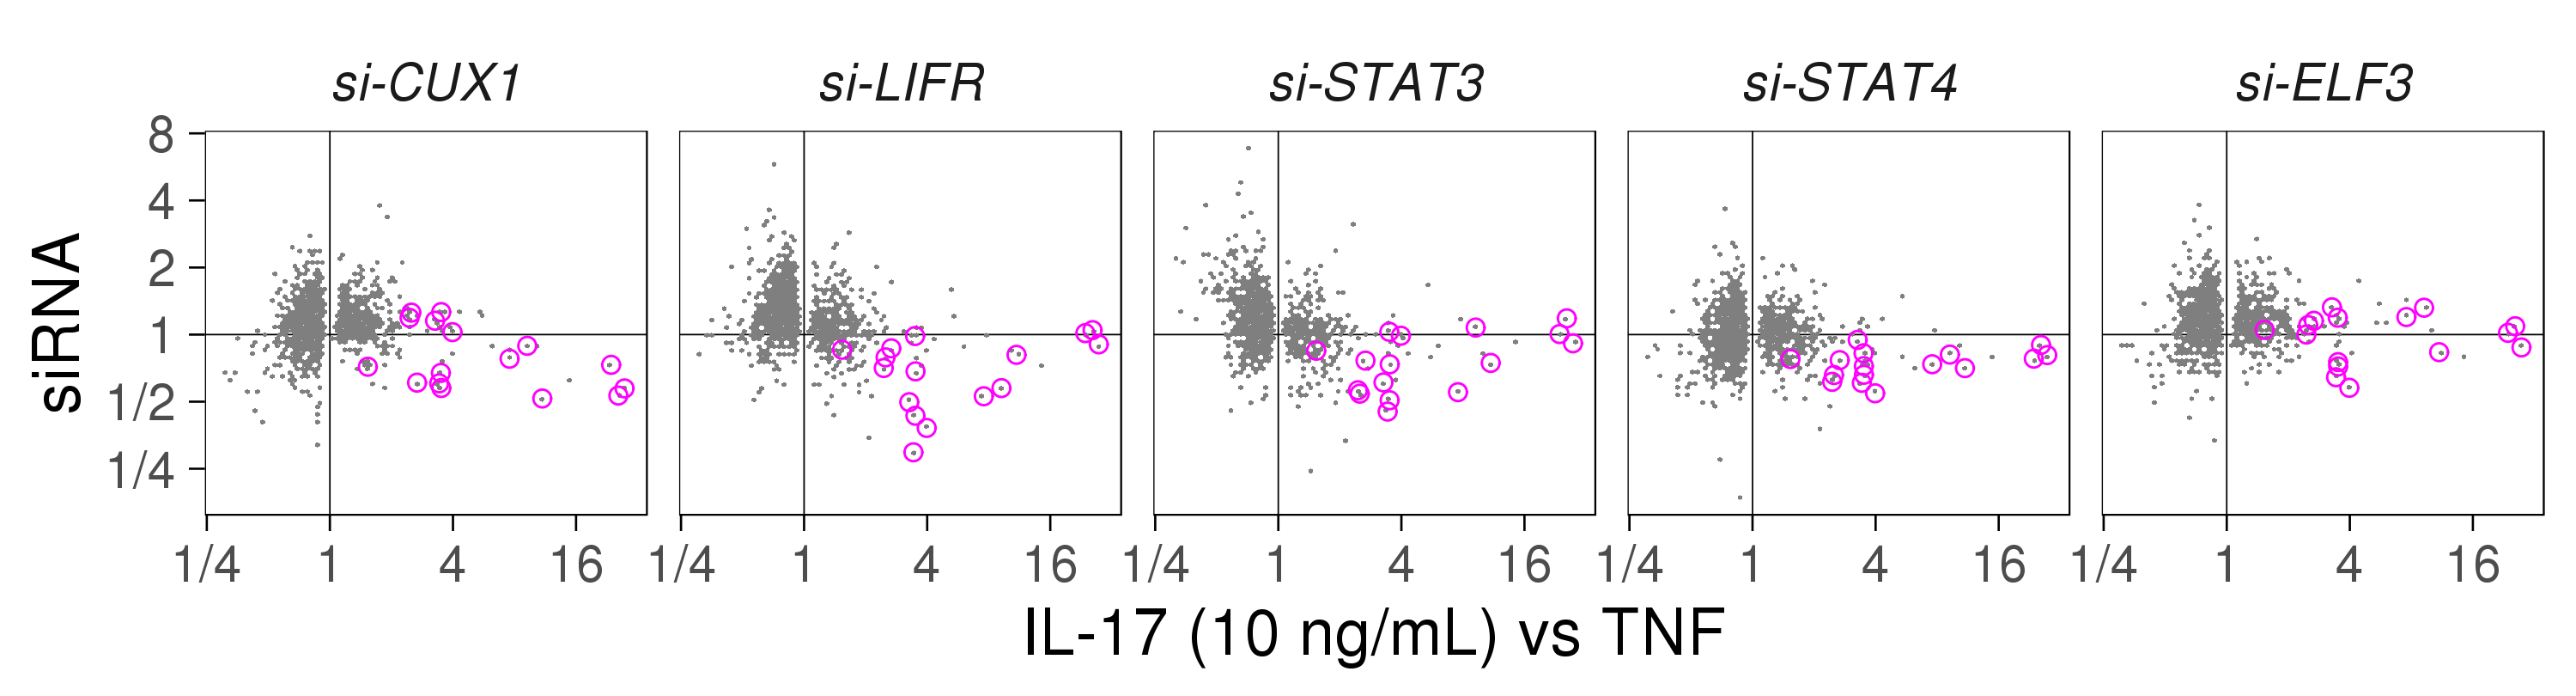

In [268]:
x <- merge(
  x = d1 %>% filter(Coef == "d10", adj.P.Val < 0.05),
  y = d2 %>% filter(Coef %in% sirnas),
  by = "ensembl_id"
)
head(x)

x %<>%
mutate(Coef.y = sprintf("si-%s", Coef.y)) %>%
mutate(Coef.y = fct_relevel(Coef.y, sprintf("si-%s", sirnas)))

p <- ggplot(x, aes(x = logFC.x, y = logFC.y)) +
geom_hline(yintercept = 0, size = 0.2) +
geom_vline(xintercept = 0, size = 0.2) +
geom_hex(data = x, bins = 80, size = 0, fill = "grey50") +
geom_point(data = x %>% filter(ID.x %in% d_genes), size = 2, shape = 21, color = "#ff00ff") +
# scale_fill_viridis_c(option = 7, trans = "log10", breaks = c(1, 10, 100, 1000, 10000)) +
facet_grid(~ Coef.y) +
scale_x_continuous(labels = function(x) fractional(2^x)) +
scale_y_continuous(labels = function(x) fractional(2^x)) +
labs(x = "IL-17 (10 ng/mL) vs TNF", y = "siRNA") +
theme(strip.text = element_text(face = "italic"))
                   
show_plot(p, res = 300)

In [266]:
x %>%
filter(logFC.x > log2(8) & Coef.y == "si-CUX1")

ensembl_id,ID.x,logFC.x,CI.L.x,CI.R.x,AveExpr.x,t.x,P.Value.x,adj.P.Val.x,B.x,⋯,CI.R.y,AveExpr.y,t.y,P.Value.y,adj.P.Val.y,B.y,Coef.y,FC,FC.R,FC.L
ENSG00000081041,CXCL2,4.7887,4.5310,5.0464,6.5967,36.6869,7.873e-82,7.825e-78,170.6637,⋯,-0.4348,4.5233,-4.3035,2.746e-05,0.002367,2.2373,si-CUX1,0.5731958,0.7397963,0.4441134
ENSG00000108342,CSF3,3.3297,2.8362,3.8233,1.7908,13.3199,4.801e-28,5.023e-25,52.9430,⋯,0.0381,0.3239,-1.6432,1.021e-01,0.431200,-5.0438,si-CUX1,0.8767273,1.0267607,0.7485653
ENSG00000124875,CXCL6,3.4515,2.9666,3.9364,7.3836,14.0524,4.156e-30,5.508e-27,57.5783,⋯,-0.3797,4.2494,-3.2803,1.243e-03,0.032900,-1.2566,si-CUX1,0.5166288,0.7685974,0.3472869
ENSG00000136244,IL6,3.2068,2.9430,3.4707,10.7486,23.9983,5.215e-56,1.481e-52,115.2084,⋯,0.4580,6.5545,-0.5282,5.980e-01,0.879000,-6.2148,si-CUX1,0.8904460,1.3736362,0.5771827
ENSG00000163734,CXCL3,4.5704,4.2951,4.8457,7.8543,32.7784,1.187e-74,5.900e-71,155.5365,⋯,-0.0960,4.1517,-2.5062,1.310e-02,0.143200,-3.3405,si-CUX1,0.7312821,0.9356235,0.5716088
ENSG00000163739,CXCL1,4.6875,4.4172,4.9578,10.3329,34.2411,2.070e-77,1.372e-73,161.3807,⋯,-0.4123,6.7642,-3.6098,3.964e-04,0.015400,-0.2196,si-CUX1,0.5324065,0.7514245,0.3772257
ENSG00000166920,NMES1,3.8920,3.5981,4.1860,5.6789,26.1393,6.537e-61,2.599e-57,125.9342,⋯,0.0210,1.7131,-1.9124,5.740e-02,0.324700,-4.5852,si-CUX1,0.6326590,1.0146625,0.3944734
